In [4]:
import pandas as pd

data = pd.read_csv('data/csv/occurrence_data.csv', delimiter='\t')
data = data.loc[:,['gbifID', 'countryCode', 'locality',
       'stateProvince', 'decimalLatitude', 'decimalLongitude', 'elevation',
       'eventDate', 'day',
       'month', 'year']]
data = data.drop(15365)
nan_values = data[['day', 'month', 'year']].isna()
drop_nans = data[nan_values.any(axis=1)].index
data = data.drop(drop_nans)
date_columns = data.columns[-3:]
data[date_columns] = data[date_columns].astype(int)
data_loc_date = data[['decimalLatitude', 'decimalLongitude', 'day',
       'month', 'year']]
data_loc_date.columns = ['lat', 'lon', 'day',
       'month', 'year']
nan_vals = data_loc_date.isna()
drop_index = nan_vals[nan_vals.any(axis=1)].index
data_loc_date = data_loc_date.drop(drop_index)

/tmp/ipykernel_30263/2930353917.py:3: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/csv/occurrence_data.csv', delimiter='\t')


In [32]:
data_loc_date_2013 = data_loc_date[(data_loc_date['year'] >= 2013) 
                                   & (data_loc_date['month']>=4)]
data_loc_date_2013['date'] = pd.to_datetime(data_loc_date_2013[['year', 'month', 'day']])

data_loc_date_2013['date'] = data_loc_date_2013['date'].apply(lambda x: int(x.timestamp() * 1000))

# Format datetime column to string in "yyyy-MM-dd" format
# data_loc_date_2013['date'] = data_loc_date_2013['date'].dt.strftime('%Y-%m-%d')

data_loc_date_2013.describe()

/tmp/ipykernel_30263/2799303531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_date_2013['date'] = pd.to_datetime(data_loc_date_2013[['year', 'month', 'day']])
/tmp/ipykernel_30263/2799303531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loc_date_2013['date'] = data_loc_date_2013['date'].apply(lambda x: int(x.timestamp() * 1000))


,lat,lon,day,month,year,date
count,13929.000000,13929.000000,13929.000000,13929.000000,13929.000000,1.392900e+04
mean,50.950888,6.260105,12.911767,4.123555,2019.514897,1.571702e+12
std,1.609657,3.676185,7.618019,0.437209,3.258127,1.028973e+11
min,35.233113,-7.537369,1.000000,4.000000,2013.000000,1.364774e+12
25%,50.800000,4.457823,6.000000,4.000000,2017.000000,1.491091e+12
50%,51.154350,5.300000,13.000000,4.000000,2021.000000,1.618358e+12
75%,51.836253,6.670602,18.000000,4.000000,2022.000000,1.651190e+12
max,59.918117,43.974866,31.000000,12.000000,2023.000000,1.692749e+12


In [10]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

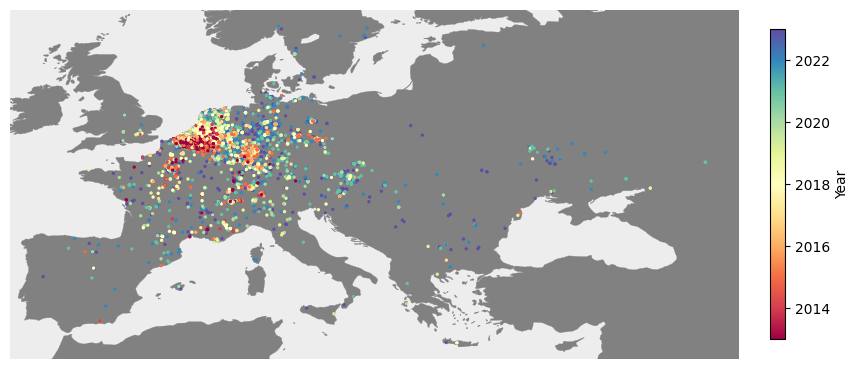

In [22]:
plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

scatter = ax.scatter(data_loc_date_2013['lon'], data_loc_date_2013['lat'], transform=ccrs.PlateCarree(), 
           c=data_loc_date_2013['year'], s=2, cmap='Spectral', vmin=2013, vmax = 2023)
ax.axis('off')

plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04, label='Year')


In [31]:
csv_out = data_loc_date_2013[['lat', 'lon', 'date']]
csv_out.to_csv('data/csv/osmia_clustering_points.csv')